# Changes in appearances of words in speeches between parties and congresses

In this example we detect changes between two corpus of speeches taken from congressional records. This example shows you how to:

- Load, arrange, and clean the data
- Compute p-values
- Use HC to detect changes

In [1]:
# Load speech data
import pandas as pd
raw_corpus = pd.read_csv("../Data/speech_w_data_example.csv", encoding = 'latin1')
headers = list(raw_corpus)
# print(headers)

In [2]:
# Select two units from raw corpus for comparison
unit1 = raw_corpus.loc[(raw_corpus.party == 'R') & (raw_corpus.chamber == 'H') & (raw_corpus.congress_id == 114), ['speech_id', 'speech']]
unit2 = raw_corpus.loc[(raw_corpus.party == 'D') & (raw_corpus.chamber == 'H') & (raw_corpus.congress_id == 114), ['speech_id', 'speech']]
# print(list(unit1))

In [3]:
# List of words to ignore
words_to_ignore = ['mr', 'unit','unanim', 'don', 'ask', 'presid','madam', 'american', 'make', 'nation',
               'let','last', 'urg', 'year', 'new', 'didn', 'dosen', 'bil', 'print', 'speaker', 'men',
                'side', 'yield', 'rank', 'rise', 'small', 'yet', 'yesterday', 'move', 'york', 'long', 
               'yes', 'xii', 'go', 'billion', 'republican', 'democrat', 'congress', 'iv','iiv', 'doesnt', 'cant',
                   'cannot', 'pelosi','weve','im','theyr', 'didnt', 'he', 'you', 'senat', 'hous', 'she',
                   'dont', 'got']

# Other lists:
import word_lists
ignore_list = words_to_ignore + word_lists.singletons + word_lists.additional_words1 + word_lists.additional_words2 + word_lists.function_words
# print(ignore_list)

In [4]:
# Test differences between two test unit
import helper_tests as tests # File containing test routine
HC = tests.two_unit_test(unit1, unit2, ignore_list)
# print(HC)
max(HC['zz'])
# XXXXXX suggest high difference in words used in speeches by each party

2.0

      word    pp
2      exp  0.01
0  massive  0.10
1     comp  0.40


Text(0.5,1,'words associated with lowest p-vals')

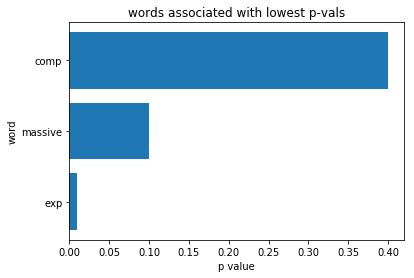

In [6]:
# Which words cause the difference?
import matplotlib.pyplot as plt
data = HC.loc[:, ['word', 'pp']].sort_values(by=['pp'])
print(data)
x_pos = range(1,data['pp'].size+1)
fig, ax = plt.subplots()
fig1 = plt.barh(x_pos, data['pp'])
plt.yticks(x_pos, data['word'])
plt.ylabel('word')
plt.xlabel('p value')
plt.title('words associated with lowest p-vals')